In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 3.8MB 52.0MB/s 
     |████████████████████████████████| 450kB 43.5MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [2]:
# Load in the data
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test  = x_train / 255.0, x_test / 255.0
print('x_train.shape:',x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2999 - accuracy: 0.9128 - val_loss: 0.1459 - val_accuracy: 0.9566
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1446 - accuracy: 0.9569 - val_loss: 0.1081 - val_accuracy: 0.9666
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1101 - accuracy: 0.9668 - val_loss: 0.0880 - val_accuracy: 0.9741
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0786 - val_accuracy: 0.9755
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0772 - accuracy: 0.9760 - val_loss: 0.0770 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0680 - accuracy: 0.9783 - val_loss: 0.0717 - val_accuracy: 0.9781
Epoch 7/10
60000/60000 [==============================]

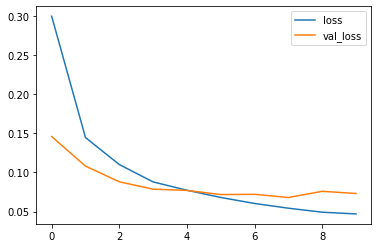

In [6]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

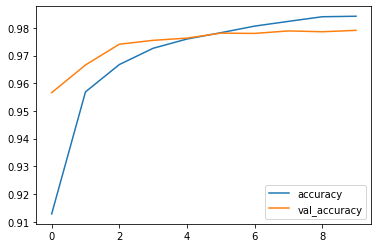

In [7]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Confustion matrix, without normalization
[[ 971    0    2    0    0    1    3    1    2    0]
 [   0 1124    4    0    0    0    2    1    4    0]
 [   1    1 1017    0    2    0    2    7    2    0]
 [   0    0    9  982    0    5    0    6    5    3]
 [   0    0    2    0  966    0    6    2    2    4]
 [   2    0    0    8    2  867    5    1    6    1]
 [   2    3    3    1    1    3  943    0    2    0]
 [   1    4    9    1    0    0    0 1007    4    2]
 [   6    1    7    2    4    1    1    4  947    1]
 [   1    3    1    3   15    1    1    9    8  967]]


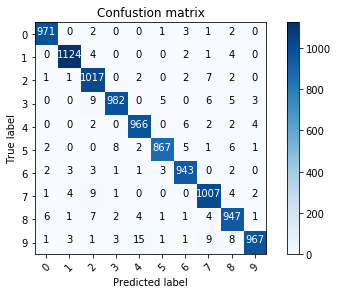

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confustion matrix',cmap=plt.cm.Blues):
  ###
  # This function prints and plots the confustion matrix
  # Normalization can be applied by setting 'normalize=True' 
  ###
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confustion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()  / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, format(cm[i,j],fmt),
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

# Do the results make sense?
# its easy to confuse 9<->4, 9<->7, 2<->7 etc

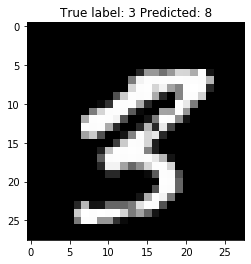

In [18]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i],p_test[i]));